In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd


In [ ]:
#Read the CSV file and display the first five rows
# Dataset Overview:
import os

# Construct the relative path
relative_path = os.path.join("data", "retail_sales_dataset.csv")

df = pd.read_csv(relative_path)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [20]:
#Displays summary information 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [17]:
#Display summary statistics
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
#Unique Values
print("Unique Genders:", df['Gender'].unique())
print("Unique Product Categories:", df['Product Category'].unique())
print("Unique Customer IDs:", df['Customer ID'].nunique())

Unique Genders: ['Male' 'Female']
Unique Product Categories: ['Beauty' 'Clothing' 'Electronics']
Unique Customer IDs: 1000


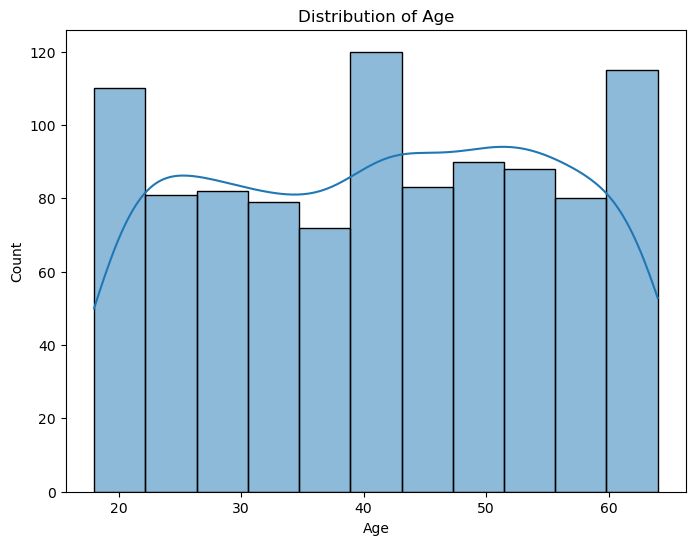

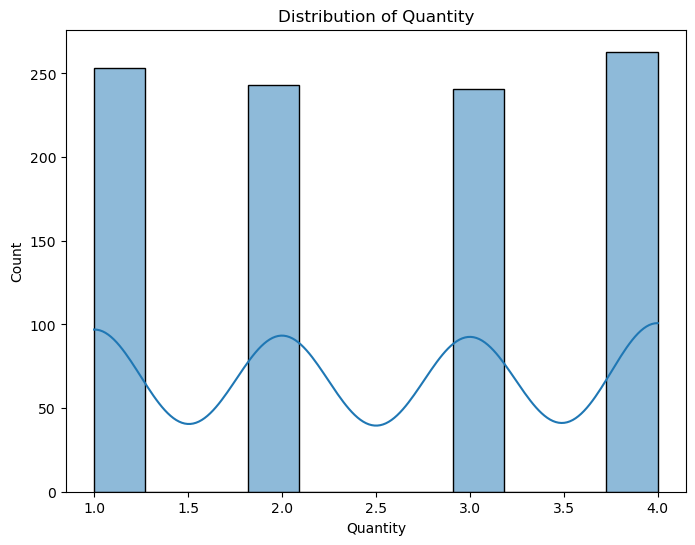

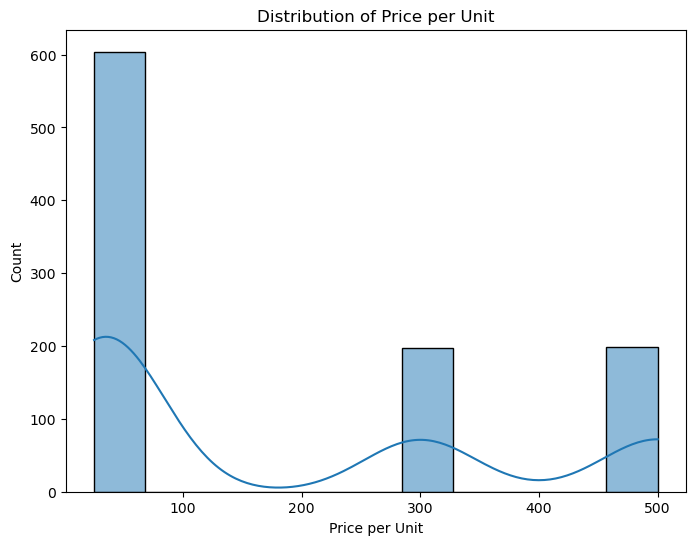

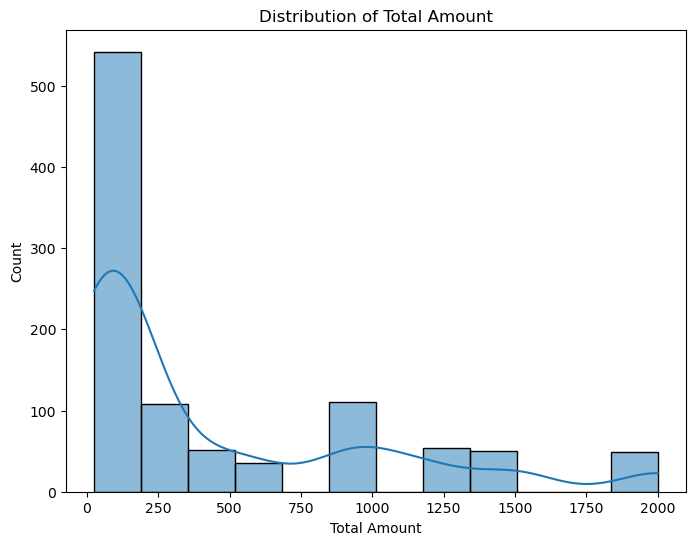

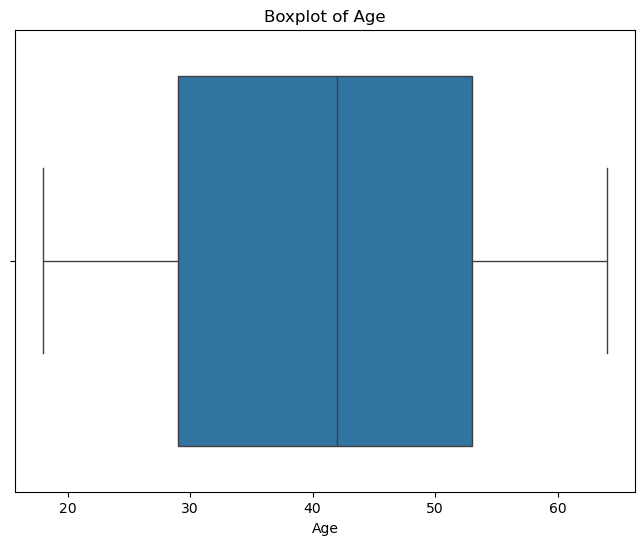

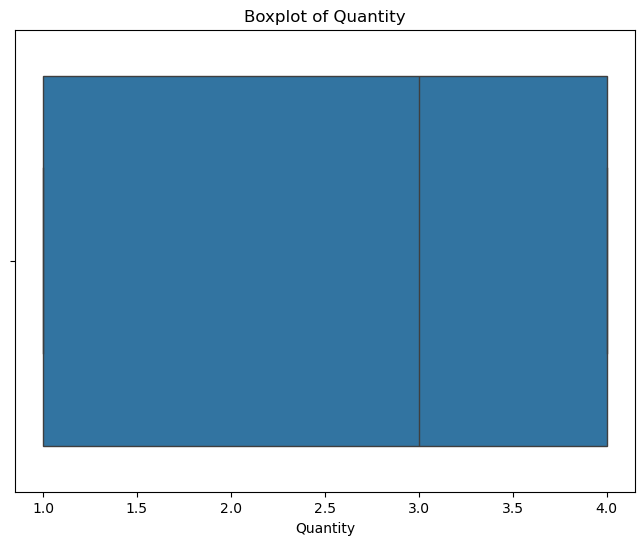

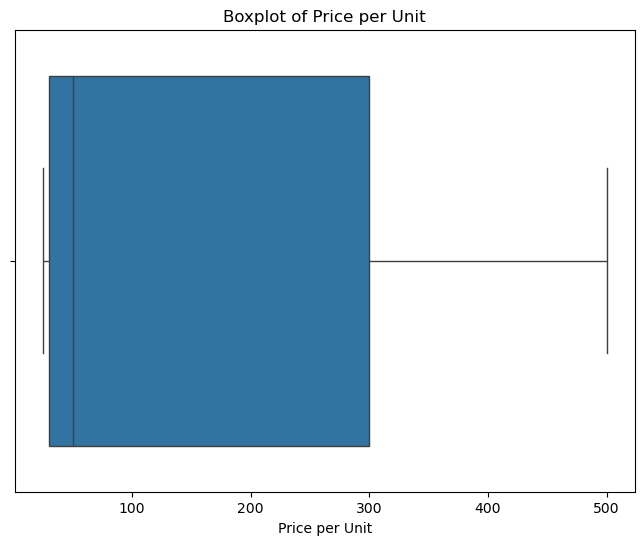

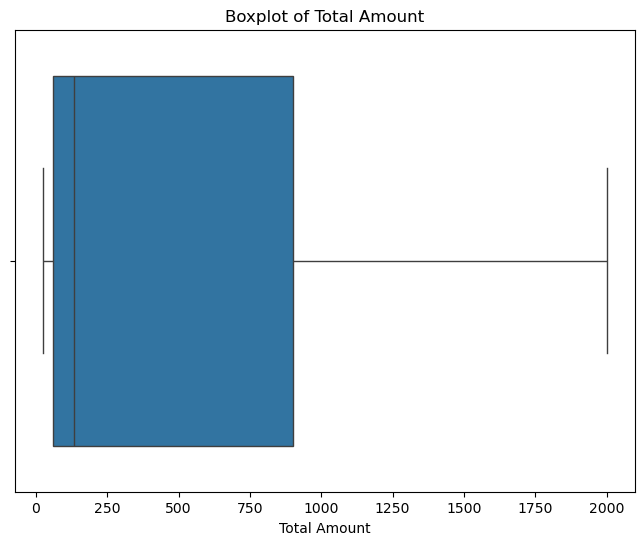

In [ ]:
# isualizations:
# Distribution of Numerical Variables:

import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

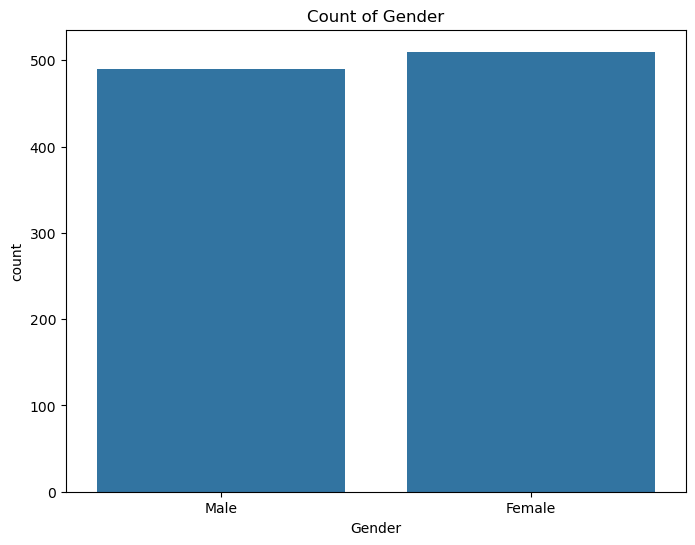

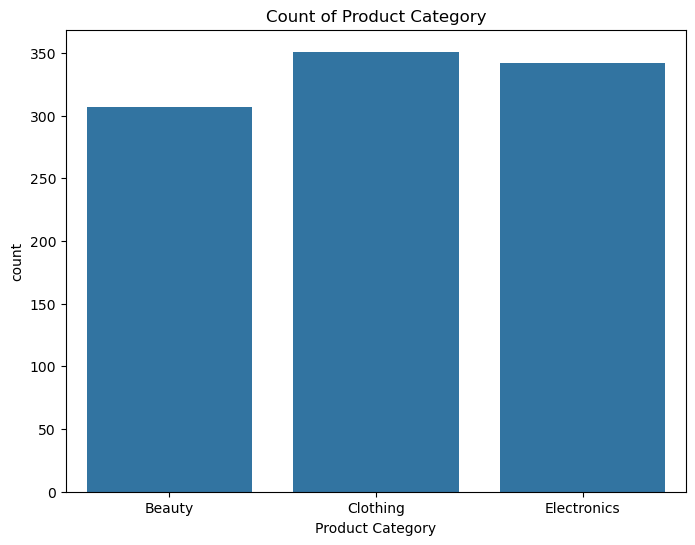

In [7]:
# Distribution of Categorical Variables:
categorical_cols = ['Gender', 'Product Category']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
    plt.show()

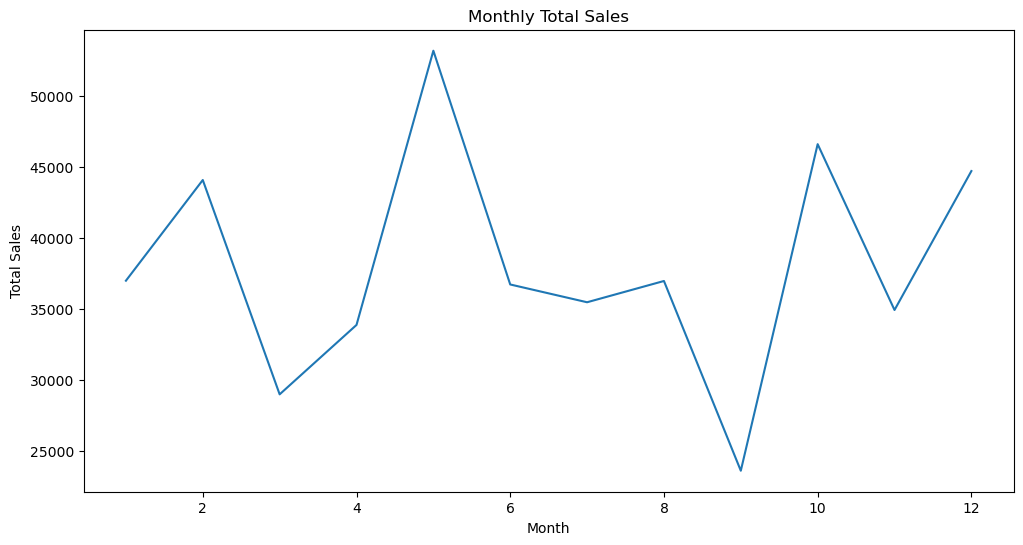

In [25]:
#Time Series Analysis (Date):
plt.figure(figsize=(12, 6))
df.groupby(pd.to_datetime(df['Date']).dt.month)['Total Amount'].sum().plot()
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

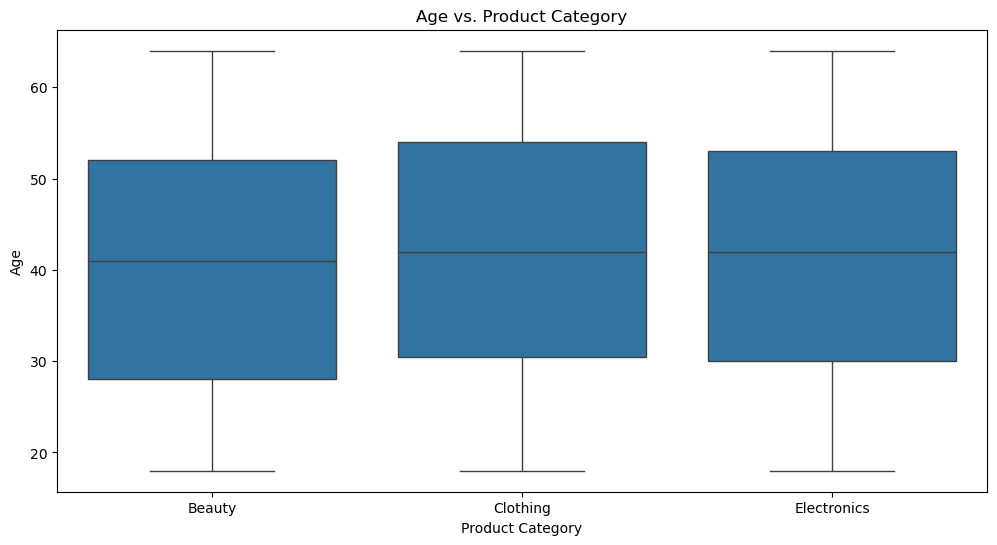

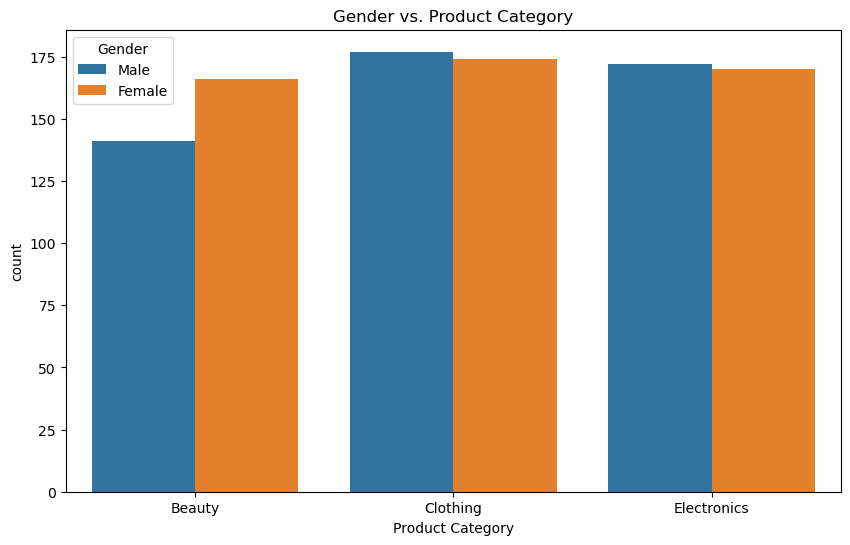

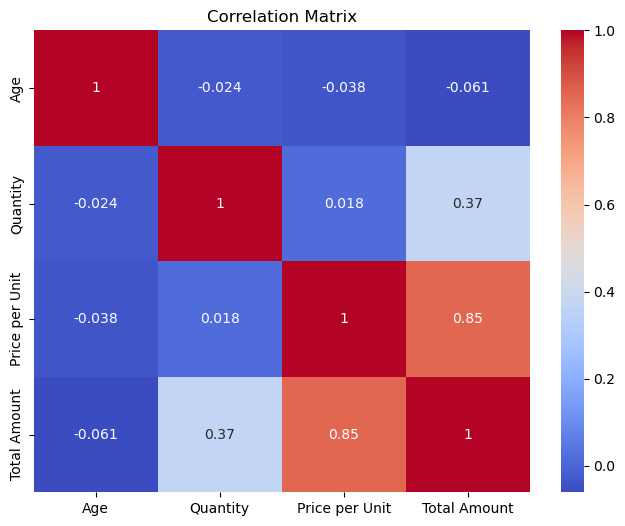

In [26]:
#Relationships Between Variables:
# Age vs. Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Age', data=df)
plt.title('Age vs. Product Category')
plt.show()

# Gender vs. Product Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', hue='Gender', data=df)
plt.title('Gender vs. Product Category')
plt.show()

# Correlation Matrix (Numerical Columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()